In [ ]:
import itertools
from collections import defaultdict

# Load the dataset from the downloaded file
def load_dataset(filepath):
    """
    Load transactions from a file where each line is a transaction with item IDs separated by spaces.
    """
    with open(filepath, 'r', encoding='ISO-8859-1') as file:  # Specify encoding
        transactions = [line.strip().split() for line in file]
    return transactions

# Function to get support counts for itemsets
def get_support_counts(transactions, itemsets):
    """
    Calculate the support count for each itemset in the list of transactions.
    """
    support_counts = defaultdict(int)
    for transaction in transactions:
        transaction_set = set(transaction)
        for itemset in itemsets:
            if itemset.issubset(transaction_set):
                support_counts[itemset] += 1
    return support_counts

# Generate candidate itemsets of a specific size k
def generate_candidates(frequent_itemsets, k):
    """
    Generate candidate itemsets of size k based on frequent itemsets of size k-1.
    """
    candidates = []
    frequent_items = list(frequent_itemsets.keys())
    for i in range(len(frequent_items)):
        for j in range(i + 1, len(frequent_items)):
            candidate = frequent_items[i].union(frequent_items[j])
            if len(candidate) == k:
                candidates.append(candidate)
    return set(candidates)

# Apriori algorithm to find frequent itemsets
def apriori(transactions, min_support_count):
    """
    Run the Apriori algorithm on transactions with a specified minimum support count.
    """
    # Step 1: Find frequent 1-itemsets
    single_items = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            single_items[frozenset([item])] += 1
    frequent_itemsets = {itemset: count for itemset, count in single_items.items() if count >= min_support_count}

    # Step 2: Generate frequent itemsets of increasing size
    k = 2
    all_frequent_itemsets = frequent_itemsets.copy()
    while frequent_itemsets:
        candidates = generate_candidates(frequent_itemsets, k)
        candidate_support_counts = get_support_counts(transactions, candidates)
        frequent_itemsets = {itemset: count for itemset, count in candidate_support_counts.items() if count >= min_support_count}
        all_frequent_itemsets.update(frequent_itemsets)
        k += 1

    return all_frequent_itemsets

# Experiment with different minimum support counts
def find_frequent_patterns(filepath, min_support_counts):
    """
    Run the Apriori algorithm for each minimum support count in min_support_counts and return results.
    """
    transactions = load_dataset(filepath)
    results = {}
    for min_support in min_support_counts:
        print(f"Running Apriori with minimum support count = {min_support}")
        frequent_itemsets = apriori(transactions, min_support)
        results[min_support] = frequent_itemsets
        print(f"Found {len(frequent_itemsets)} frequent itemsets with min support {min_support}")
    return results

# File path for retail dataset
filepath = 'retail.txt'  # Update with the path to retail.txt on your system
# List of minimum support counts to test
min_support_counts = [100, 500, 1000, 1500]

# Run the Apriori algorithm and collect results for each support count
results = find_frequent_patterns(filepath, min_support_counts)

# Display the results
for min_support, itemsets in results.items():
    print(f"\nMinimum Support: {min_support}")
    for itemset, count in itemsets.items():
        print(f"Itemset: {set(itemset)}, Support Count: {count}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running Apriori with minimum support count = 100
Found 1 frequent itemsets with min support 100
Running Apriori with minimum support count = 500
Found 0 frequent itemsets with min support 500
Running Apriori with minimum support count = 1000
Found 0 frequent itemsets with min support 1000
Running Apriori with minimum support count = 1500
Found 0 frequent itemsets with min support 1500

Minimum Support: 100
Itemset: {'\x00'}, Support Count: 278

Minimum Support: 500

Minimum Support: 1000

Minimum Support: 1500


In [ ]:
import itertools
from collections import defaultdict

# Load the dataset
def load_dataset(filepath):
    with open(filepath, 'r', encoding='ISO-8859-1') as file:  # Specify encoding to avoid Unicode errors
        transactions = [line.strip().split() for line in file]
    return transactions

# Get item support counts
def get_support_counts(transactions, itemsets):
    support_counts = defaultdict(int)
    for transaction in transactions:
        transaction_set = set(transaction)
        for itemset in itemsets:
            if itemset.issubset(transaction_set):
                support_counts[itemset] += 1
    return support_counts

# Generate candidate itemsets of size k
def generate_candidates(frequent_itemsets, k):
    candidates = []
    frequent_items = list(frequent_itemsets.keys())
    for i in range(len(frequent_items)):
        for j in range(i + 1, len(frequent_items)):
            candidate = frequent_items[i].union(frequent_items[j])
            if len(candidate) == k:
                candidates.append(candidate)
    return set(candidates)

# Apriori algorithm to find frequent itemsets
def apriori(transactions, min_support_count):
    single_items = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            single_items[frozenset([item])] += 1
    frequent_itemsets = {itemset: count for itemset, count in single_items.items() if count >= min_support_count}

    k = 2
    all_frequent_itemsets = frequent_itemsets.copy()
    while frequent_itemsets:
        candidates = generate_candidates(frequent_itemsets, k)
        candidate_support_counts = get_support_counts(transactions, candidates)
        frequent_itemsets = {itemset: count for itemset, count in candidate_support_counts.items() if count >= min_support_count}
        all_frequent_itemsets.update(frequent_itemsets)
        k += 1

    return all_frequent_itemsets

# Generate association rules from frequent itemsets
def generate_association_rules(frequent_itemsets, min_confidence, transactions):
    rules = []
    transaction_count = len(transactions)

    # Support count dictionary
    support_count = {itemset: count for itemset, count in frequent_itemsets.items()}

    # Iterate over all itemsets with size >= 2 to generate rules
    for itemset in frequent_itemsets.keys():
        if len(itemset) < 2:
            continue
        # For each itemset, try to split it into rule pairs: LHS => RHS
        for i in range(1, len(itemset)):
            for lhs in itertools.combinations(itemset, i):
                lhs = frozenset(lhs)
                rhs = itemset - lhs
                if rhs:
                    # Calculate confidence
                    confidence = support_count[itemset] / support_count[lhs]
                    if confidence >= min_confidence:
                        rule = (lhs, rhs, confidence)
                        rules.append(rule)
    return rules

# Experiment with different confidence levels
def find_association_rules(filepath, min_support_count, min_confidence_values):
    transactions = load_dataset(filepath)
    # First, get frequent itemsets using Apriori
    frequent_itemsets = apriori(transactions, min_support_count)

    # Generate and filter rules for each confidence level
    results = {}
    for min_confidence in min_confidence_values:
        print(f"Generating rules with minimum confidence = {min_confidence}")
        rules = generate_association_rules(frequent_itemsets, min_confidence, transactions)
        results[min_confidence] = rules
        print(f"Found {len(rules)} rules with min confidence {min_confidence}")
    return results

# File path for retail dataset (update this path with the location of retail.txt on your system)
filepath = 'retail.txt'  # Replace with your dataset path
min_support_count = 1000  # Minimum support threshold for frequent itemsets
min_confidence_values = [0.5, 0.6, 0.7]  # Varying confidence values

# Run the association rule mining
association_rules_results = find_association_rules(filepath, min_support_count, min_confidence_values)

# Display the results
for min_confidence, rules in association_rules_results.items():
    print(f"\nMinimum Confidence: {min_confidence}")
    for lhs, rhs, confidence in rules:
        print(f"Rule: {set(lhs)} => {set(rhs)}, Confidence: {confidence:.2f}")


Generating rules with minimum confidence = 0.5
Found 0 rules with min confidence 0.5
Generating rules with minimum confidence = 0.6
Found 0 rules with min confidence 0.6
Generating rules with minimum confidence = 0.7
Found 0 rules with min confidence 0.7

Minimum Confidence: 0.5

Minimum Confidence: 0.6

Minimum Confidence: 0.7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


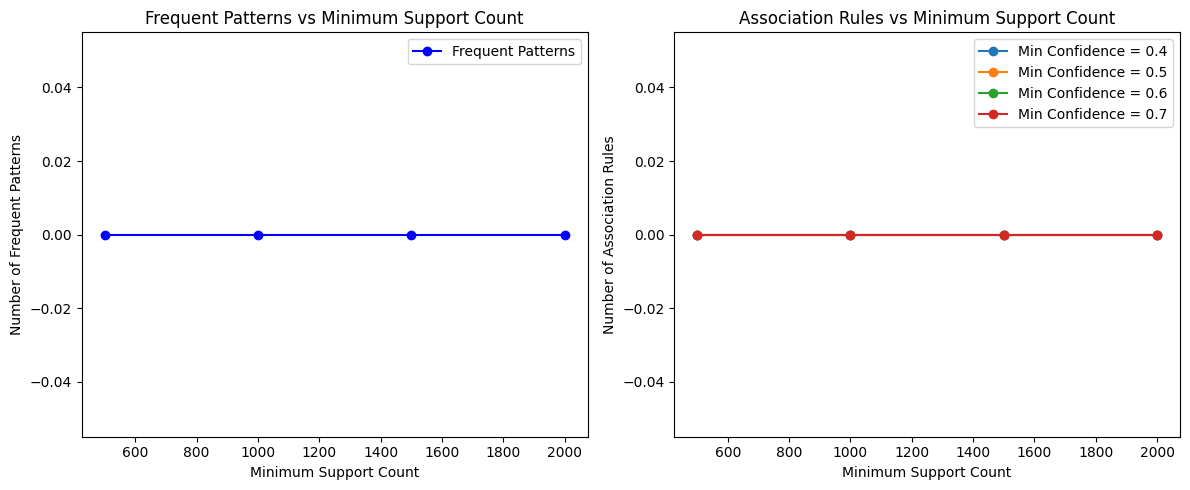

In [ ]:
import itertools
from collections import defaultdict
import matplotlib.pyplot as plt

# Load the dataset
def load_dataset(filepath):
    with open(filepath, 'r', encoding='ISO-8859-1') as file:  # Specify encoding to avoid Unicode errors
        transactions = [line.strip().split() for line in file]
    return transactions

# Get item support counts
def get_support_counts(transactions, itemsets):
    support_counts = defaultdict(int)
    for transaction in transactions:
        transaction_set = set(transaction)
        for itemset in itemsets:
            if itemset.issubset(transaction_set):
                support_counts[itemset] += 1
    return support_counts

# Generate candidate itemsets of size k
def generate_candidates(frequent_itemsets, k):
    candidates = []
    frequent_items = list(frequent_itemsets.keys())
    for i in range(len(frequent_items)):
        for j in range(i + 1, len(frequent_items)):
            candidate = frequent_items[i].union(frequent_items[j])
            if len(candidate) == k:
                candidates.append(candidate)
    return set(candidates)

# Apriori algorithm to find frequent itemsets
def apriori(transactions, min_support_count):
    single_items = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            single_items[frozenset([item])] += 1
    frequent_itemsets = {itemset: count for itemset, count in single_items.items() if count >= min_support_count}

    k = 2
    all_frequent_itemsets = frequent_itemsets.copy()
    while frequent_itemsets:
        candidates = generate_candidates(frequent_itemsets, k)
        candidate_support_counts = get_support_counts(transactions, candidates)
        frequent_itemsets = {itemset: count for itemset, count in candidate_support_counts.items() if count >= min_support_count}
        all_frequent_itemsets.update(frequent_itemsets)
        k += 1

    return all_frequent_itemsets

# Generate association rules from frequent itemsets
def generate_association_rules(frequent_itemsets, min_confidence, transactions):
    rules = []
    transaction_count = len(transactions)

    # Support count dictionary
    support_count = {itemset: count for itemset, count in frequent_itemsets.items()}

    # Iterate over all itemsets with size >= 2 to generate rules
    for itemset in frequent_itemsets.keys():
        if len(itemset) < 2:
            continue
        # For each itemset, try to split it into rule pairs: LHS => RHS
        for i in range(1, len(itemset)):
            for lhs in itertools.combinations(itemset, i):
                lhs = frozenset(lhs)
                rhs = itemset - lhs
                if rhs:
                    # Calculate confidence
                    confidence = support_count[itemset] / support_count[lhs]
                    if confidence >= min_confidence:
                        rule = (lhs, rhs, confidence)
                        rules.append(rule)
    return rules

# Experiment with different support counts and confidence levels
def experiment_with_support_and_confidence(filepath, min_support_counts, min_confidence_values):
    transactions = load_dataset(filepath)

    # Data storage for plotting
    support_pattern_counts = []
    confidence_rule_counts = {min_conf: [] for min_conf in min_confidence_values}

    # Find frequent itemsets for each support count
    for min_support in min_support_counts:
        frequent_itemsets = apriori(transactions, min_support)
        support_pattern_counts.append(len(frequent_itemsets))

        # Generate association rules for each confidence level
        for min_confidence in min_confidence_values:
            rules = generate_association_rules(frequent_itemsets, min_confidence, transactions)
            confidence_rule_counts[min_confidence].append(len(rules))

    return support_pattern_counts, confidence_rule_counts

# File path for retail dataset (update this path with the location of retail.txt on your system)
filepath = 'retail.txt'  # Replace with your dataset path
min_support_counts = [500, 1000, 1500, 2000]  # Minimum support thresholds for frequent itemsets
min_confidence_values = [0.4, 0.5, 0.6, 0.7]  # Varying confidence values

# Run the experiment and gather results
support_pattern_counts, confidence_rule_counts = experiment_with_support_and_confidence(filepath, min_support_counts, min_confidence_values)

# Plotting the number of frequent patterns for different support counts
plt.figure(figsize=(12, 5))

# Plot frequent patterns vs support count
plt.subplot(1, 2, 1)
plt.plot(min_support_counts, support_pattern_counts, marker='o', color='b', label='Frequent Patterns')
plt.xlabel('Minimum Support Count')
plt.ylabel('Number of Frequent Patterns')
plt.title('Frequent Patterns vs Minimum Support Count')
plt.legend()

# Plot association rules vs confidence for each support count
plt.subplot(1, 2, 2)
for min_confidence, rule_counts in confidence_rule_counts.items():
    plt.plot(min_support_counts, rule_counts, marker='o', label=f'Min Confidence = {min_confidence}')
plt.xlabel('Minimum Support Count')
plt.ylabel('Number of Association Rules')
plt.title('Association Rules vs Minimum Support Count')
plt.legend()

plt.tight_layout()
plt.show()
